In [135]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve, correlate

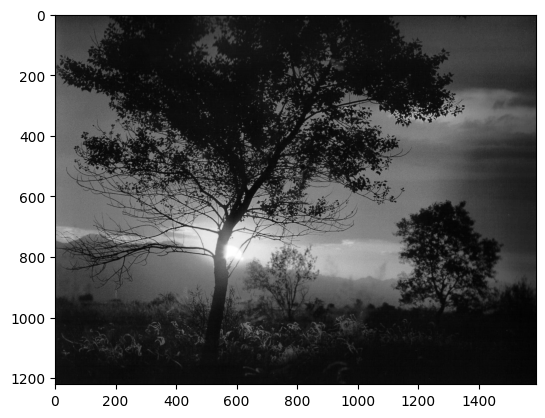

In [92]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

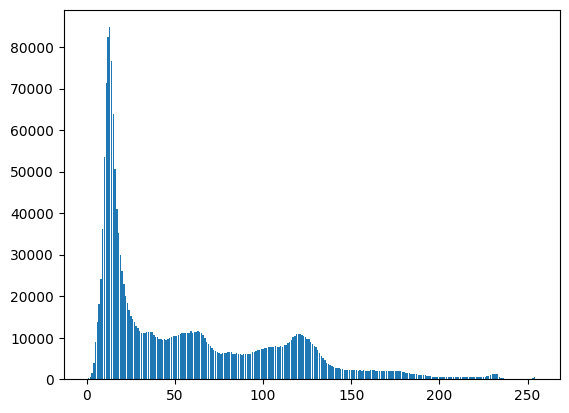

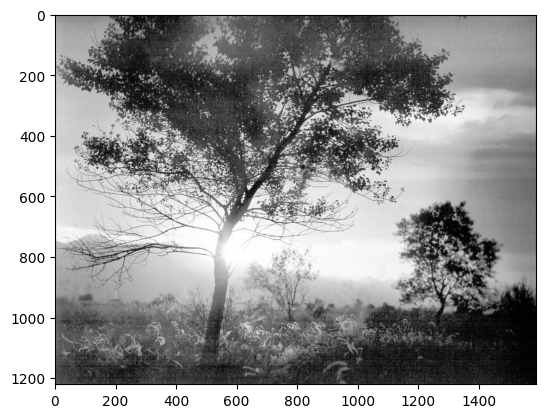

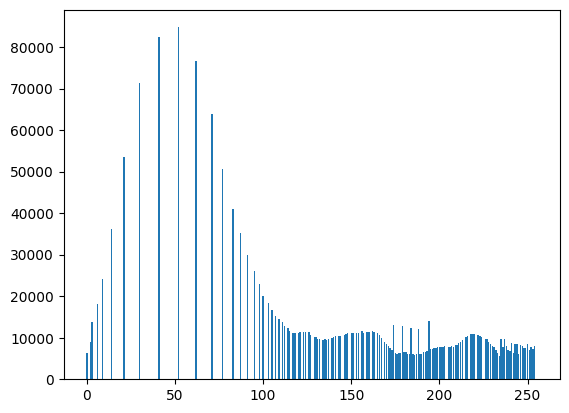

In [91]:
def create_histogram(img):
    ret = []
    cum = []
    last = 0
    prod = img.shape[0]*img.shape[1]
    for i in range(256):
        ret.append(np.where(img == i, 1, 0).sum())
        cum.append(ret[-1]+last)
        last += ret[-1]
    return np.array(ret),np.array(cum)

values,cumulative = create_histogram(gray)
plt.bar(range(256), values)
plt.show()
def equalize_histogram(img):
    new_img = np.zeros(img.shape)
    cum = create_histogram(img)[1]
    dim = np.prod(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i,j] = (cum[img[i,j]]/dim)*255
    new_img = new_img.astype(np.uint8)
    return new_img

equalized = equalize_histogram(gray)
plt.imshow(equalized, cmap='gray')
plt.show()
plt.bar(range(256),create_histogram(equalized)[0])
plt.show()

In [99]:
print(gray.shape)

(1221, 1589)


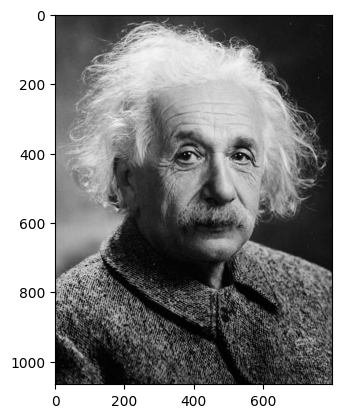

In [110]:
gray = cv2.imread('person.jpg')
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [115]:
filt

array([], shape=(0, 800), dtype=uint8)

(1066, 800)

(201, 201)


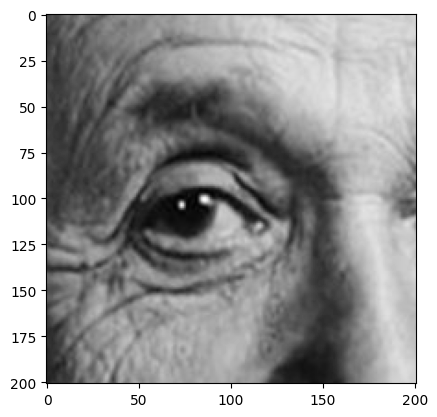

In [131]:
filt = gray[300:501,300:501]
print(filt.shape)
plt.imshow(filt, cmap='gray')


In [108]:
def apply_filter(img,filter):
    new_img = np.zeros(img.shape)
    m,n = img.shape
    k,l = filter.shape
    a,b = k//2,l//2
    img_target = np.zeros((m+2*a,n+2*b))
    img_target[a:m+a,b:n+b] = img
    
    for i in range(m):
        for j in range(n):
            new_img[i,j] = np.sum(img_target[i:i+k,j:j+l]*filter)
    new_img = new_img.astype(np.uint8)
    return new_img



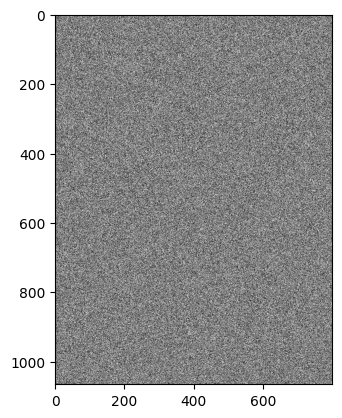

In [136]:
plt.imshow(correlate(gray,filt), cmap='gray')